In [1]:
import ROOT
import hist
import matplotlib.pyplot as plt
import mplhep as hep

Welcome to JupyROOT 6.26/00


In [2]:
#define a TChain to combine all signal samples
sample_path = "/cms/user/guojl/Sample/2L2Q/UL_Legacy/2018/MC/ggh/"
chain = ROOT.TChain("Ana/passedEvents")
chain.Add(f"{sample_path}GluGluHToZZTo2L2Q_M400_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root")
chain.Add(f"{sample_path}GluGluHToZZTo2L2Q_M500_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root")
chain.Add(f"{sample_path}GluGluHToZZTo2L2Q_M600_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root")
chain.Add(f"{sample_path}GluGluHToZZTo2L2Q_M700_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v2_0.root")
chain.Add(f"{sample_path}GluGluHToZZTo2L2Q_M800_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root")
chain.Add(f"{sample_path}GluGluHToZZTo2L2Q_M900_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root")
chain.Add(f"{sample_path}GluGluHToZZTo2L2Q_M1000_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root")
chain.Add(f"{sample_path}GluGluHToZZTo2L2Q_M1500_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v2_0.root")
chain.Add(f"{sample_path}GluGluHToZZTo2L2Q_M2000_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root")
chain.Add(f"{sample_path}GluGluHToZZTo2L2Q_M2500_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root")
chain.Add(f"{sample_path}GluGluHToZZTo2L2Q_M3000_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root")

1

In [12]:
#define a function a compte deltaR
#def deltaR(eta1, phi1, eta2, phi2):
#    deta = eta1 - eta2
#    dphi = phi1 - phi2
#    if dphi > ROOT.TMath.Pi():
#        dphi -= 2*ROOT.TMath.Pi()
#    if dphi < -ROOT.TMath.Pi():
#        dphi += 2*ROOT.TMath.Pi()
#    return ROOT.TMath.Sqrt(deta*deta + dphi*dphi)

import numpy as np
import math

def deltaR( eta1, phi1, eta2, phi2):
    if abs(phi1-phi2)>np.pi:
        dR = math.sqrt((2.*np.pi - abs(phi1 - phi2)) * (2.*np.pi - abs(phi1 - phi2)) + (eta1 - eta2) * (eta1 - eta2))
    else:
        dR = math.sqrt((phi1 - phi2) * (phi1 - phi2) + (eta1 - eta2) * (eta1 - eta2))
    return dR

In [13]:
#loop over the chain and compte DR fill the histogram DR vs GEN_H_mass
h = hist.Hist(
              hist.axis.Regular(100, 0, 3000, name="GEN_H_mass", label="GEN_H_mass [GeV]"),
              hist.axis.Regular(30, 0, 3, name="DR", label="DR")
              )
for ievent,event in enumerate(chain):
    if ievent % 10000 == 0:
        print(f"Processing event {ievent}")
    #check if is eletron channel in the event
    if abs(event.GENlep_id[0]) != 11 or abs(event.GENlep_id[1]) != 11:
        continue
    else:
        #compute the DR between two leptons
        dr = deltaR(event.GENlep_eta[0], event.GENlep_phi[0], event.GENlep_eta[1], event.GENlep_phi[1])
        h.fill(GEN_H_mass=event.GENH_mass[0], DR=dr)
    

Processing event 0
Processing event 10000
Processing event 20000
Processing event 30000
Processing event 40000
Processing event 50000
Processing event 60000
Processing event 70000
Processing event 80000
Processing event 90000
Processing event 100000
Processing event 110000
Processing event 120000
Processing event 130000
Processing event 140000
Processing event 150000
Processing event 160000
Processing event 170000
Processing event 180000
Processing event 190000
Processing event 200000
Processing event 210000
Processing event 220000
Processing event 230000
Processing event 240000
Processing event 250000
Processing event 260000
Processing event 270000
Processing event 280000
Processing event 290000
Processing event 300000
Processing event 310000
Processing event 320000
Processing event 330000
Processing event 340000
Processing event 350000
Processing event 360000
Processing event 370000
Processing event 380000
Processing event 390000
Processing event 400000
Processing event 410000
Proces

Text(0, 0.5, 'DR(e,e)')

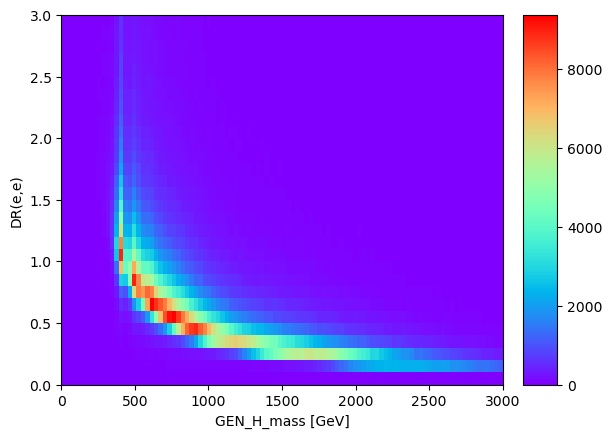

In [14]:
#plot the histogram
h.plot2d(cmap='rainbow')
#set the x-axis and y-axis label
plt.xlabel("GEN_H_mass [GeV]")
plt.ylabel("DR(e,e)")




In [29]:
ROOT.Math.VectorUtil.DeltaR(1,1,1,1)

TypeError: Template method resolution failed:
  Failed to instantiate "DeltaR(int,int,int,int)"